* **Notes:**
    * Due November 1, 2022 11:59 PM
    * Report Assignment and codes due on Friday(22/10) 11:59 PM; Submission closes by Saturday (23/10) 11: 59 PM.
    * Please update the report document attached with this assignment or submit a PDF. Don't submit the report as a ZIP file.
    * Submission after due date shall attract a penalty of 0.5 marks.
    * Please submit the assignments before closing time. Submissions through mail or Teams Chat shall not be entertained.
    * You are encouraged to discuss with your team mates. But each one has to write his / her own code and report. Code & report are individual works & not team work.
    * Plagiarism (copying from others / sources such as internet) is strictly prohibited. Upon detection, all parties involved shall be penalized with 0 score.

* **Main Section (Mandatory):**
    * Please refer to the “Sheet1” worksheet of Lab Session2 Data.xlsx file provided. The data contains text reports from an assignment from 37 students (S1 to S37).

    * Following nomenclature to be used for this assignment
    1. Report text available against each student → document or instance
    2. Words in the report text -> tokens
    3. Splitting a sentence or document into constituent words → tokenization
    4. Stop-words → commonly used words; meaning could still be retained without them
    5. White spaces, commas and full stops to act as token splitter delimiters.

# M1. Load the documents for all the 37 students. Tokenize all the documents and store the tokens.

* use the NLTK package for tokenization, or
    * Suggestion: Python users → 
    ```py
    import nltk from nltk.tokenize import word_tokenize
    ```
* write your own code for splitting the document into tokens (words)

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# imports

import nltk 
import numpy as np
import operator as op
import re
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from numpy.linalg import norm
from scipy.spatial.distance import cityblock
from math import *
from decimal import Decimal
from scipy.spatial import distance

nltk.download('punkt')
nltk.download('stopwords')

sns.set()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
pip install openpyxl

In [13]:
# read data

reports_of_students = pd.read_excel(r'C:\Users\raman\Downloads\MLlab02\Lab Session2 Data.xlsx')
reports_of_students.head()

,Student,Report
0,S1,"So based on the data, the first point what can..."
1,S2,I would suggest to make an application in whic...
2,S3,so what i observed is features in irctc data a...
3,S4,This can be solved with a Regression Machine L...
4,S5,From the stock data provided to build a system...


# M2. Merging the tokens from all documents, create a master list of distinct tokens available across all documents. Let us call this as “token population”


In [14]:
def get_tokens(text_document):
    
    #sub.replace("\n", "")
    # all punctuations to be removed
    All_punct = r'''!()-[]{};:'"’“\,<>./?@#$%^&*_~'''
    
    # remove punctuations 
    for word in text_document:
             if word in All_punct:
                text_document = text_document.replace(word, " ")
    # tokenize
    return nltk.word_tokenize(text_document)


# M3. Load the stop-words using NLTK package. Study these stop-words. What do you think they represent?

* Suggestion: Python users → 
    ```py
     from nltk.corpus import stopword
    ```


In [15]:
def lower_case_conversion_stem_and_remove_stopwords(text_document):
    stop_words = set(stopwords.words('english'))
    stop_words.add('n')
    stop_words.add('x')
    ps = PorterStemmer()

    return [ps.stem(word.lower()) for word in text_document if ps.stem(word.lower()) not in stop_words and not word.isdigit()]                                                                   

# M4. Create a “bag-of-words” from the “token population” by removing the stop-words.

In [21]:
# get unique values from list

def get_unique_values(list1):
    x = np.array(list1)
    return np.unique(x)
print(get_unique_values)

<function get_unique_values at 0x00000270B0469940>


# M5. For each document / instance, create 2 feature vectors as follows

* First vector attributes indicate the presence / absence of tokens from bag-of-words
in that document

* Second vector attributes indicate the count of presence of each word from bag-of-
words in the document

* Do this for all documents. After this is done, you should have 37 vectors each of first
and second kind.

In [22]:
def get_binary_and_count_vector(bag_of_words, doc_tokens):
    
    binary_vector = []
    count_vector = []
    len_doc_tokens = len(doc_tokens)
    for word in bag_of_words:
        if word in doc_tokens:
            binary_vector.append(1)
            count_vector.append(doc_tokens.count(word))
        else:
            binary_vector.append(0)
            count_vector.append(0)
                
    return binary_vector, count_vector

# M6. Calculate the Jaccard Coefficient between the document vectors. Use first vector for each document for this. Jaccard coefficient between two binary vectors is defined as:
```
    JC = (f11) / (f01+ f10+ f11)
    f11= number of attributes where x was 1 and y was 1; x & y are vectors
```

In [23]:
def jaccard_similarity(vector_1,vector_2):
    
    f11 = np.logical_and(vector_1, vector_2)
    f01_f10_f11 = np.logical_or(vector_1, vector_2)
    
    return round(f11.sum() / float(f01_f10_f11.sum()),2)

# M7. Calculate the Cosine similarity between the documents by using the second feature vector for each document.

```
    Cosine(A,B) = <A,B>/||A||*||B||
```

In [24]:
def cosine_similarity(vector_1, vector_2):
    return round((np.dot(vector_1,vector_2)/(norm(vector_1)*norm(vector_2))),2)

# M8. Plot the Jaccard and cosine matrices and see the results.


* Suggestion to Python users →
```python
    import seaborn as sns
    sns.heatmap(data, annot = True)
```

In [25]:
def get_jackard_binary_vector_cosine_count_vector_similarity(binary_vector_1,binary_vector_2, count_vector_1, count_vector_2):
    return  jaccard_similarity(binary_vector_1,binary_vector_2), cosine_similarity(count_vector_1,count_vector_2)

In [26]:
def heat_map(pivoted_data, title):
    
    f, ax2 = plt.subplots(figsize=(30,20 ))
    ax2.set_title(title)

    sns.heatmap(pivoted_data, annot=True, fmt="", linewidths=.5, ax=ax2)
    plt.show()

In [27]:
def get_dot_product(vector_1, vector_2):
    return sum([x*y for x,y in zip(vector_1, vector_2)])

# Optional Section

# O1. Load the “Purchase Data” worksheet of Lab Session1 Data.xlsx (provided last week). Take the first 2 purchase records provided. Calculate the following distances between these purchase records

* Manhattan or city-block distance
* Euclidean distance
* Observe the values and draw your inferences.
    

In [28]:
purchase_data = pd.read_excel('Lab Session1 Data.xlsx', sheet_name='Purchase data', nrows=10, usecols="A:E")
purchase_data.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280


In [29]:
def get_minkowski_distance(vector_1, vector_2, r_value):
    return round(distance.minkowski(vector_1,vector_2,r_value),2)

In [30]:
# manhattan

print("Manhattan ditance or city block distance using cityblock method between C_1 and C_2: ", round(cityblock(purchase_data.iloc[0, 1:4], purchase_data.iloc[1,1:4]),2))
print("Manhattan ditance or city block distance using minkowski method between C_1 and C_2: ", get_minkowski_distance(purchase_data.iloc[0, 1:4], purchase_data.iloc[1,1:4], 1))

Manhattan ditance or city block distance using cityblock method between C_1 and C_2:  11
Manhattan ditance or city block distance using minkowski method between C_1 and C_2:  11


In [31]:
# euclidean
print("Euclidean distance using euclidean method between C_1 and C_2: ", round(np.linalg.norm(purchase_data.iloc[0, 1:4] - purchase_data.iloc[1,1:4]),2))
print("Euclidean distance using minkowski method between C_1 and C_2: ", get_minkowski_distance(purchase_data.iloc[0, 1:4], purchase_data.iloc[1,1:4], 2))

Euclidean distance using euclidean method between C_1 and C_2:  6.4
Euclidean distance using minkowski method between C_1 and C_2:  6.4


# O2. For the same two above records, calculate the Minkowski distance (formula provided below) for orders (r values) 1 to 10. Make a plot of the Minkowski distances against the r values and observe the nature of the graph.

In [32]:
stock_data = pd.read_excel('Lab Session1 Data.xlsx', sheet_name='IRCTC Stock Price')
stock_data.head()

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023


In [33]:
def calculate_minkowski_distance_plot_r_vs_distance(vector_1, vector_2, max_r):
    minkowski_distance_dataframe = pd.DataFrame(columns=["r value","minkowski distance"])

    for r in range(1,max_r+1):

        distance_minkowski = get_minkowski_distance(vector_1, vector_2, r)
        minkowski_distance_dataframe.loc[len(minkowski_distance_dataframe), minkowski_distance_dataframe.columns] = r, distance_minkowski

        print("Distance using minkowski method for r {}: {}".format(r, distance_minkowski))
        
    warnings.simplefilter(action='ignore', category=FutureWarning)
    minkowski_distance_dataframe.plot(x='r value', y='minkowski distance', style='o')

Distance using minkowski method for r 1: 29.9
Distance using minkowski method for r 2: 17.34
Distance using minkowski method for r 3: 15.38
Distance using minkowski method for r 4: 14.81
Distance using minkowski method for r 5: 14.6
Distance using minkowski method for r 6: 14.52
Distance using minkowski method for r 7: 14.48
Distance using minkowski method for r 8: 14.47
Distance using minkowski method for r 9: 14.46
Distance using minkowski method for r 10: 14.45


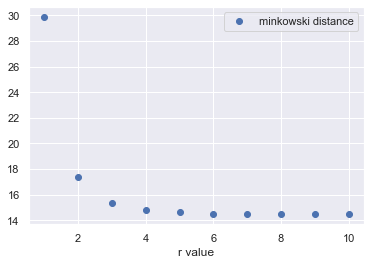

In [34]:
calculate_minkowski_distance_plot_r_vs_distance(stock_data.iloc[0, 3:7],stock_data.iloc[1,3:7],10 )

# O3. Load the “IRCTC Stock Price” worksheet of Lab Session1 Data.xlsx. Consider the “High” and “Low” columns as 2 vectors (249-dimensional vector space). Repeat exercises O1 & O2 on these vectors.

Manhattan ditance or city block distance using cityblock method :  11799.55
Manhattan ditance or city block distance using minkowski method :  11799.55
Euclidean distance using euclidean method :  931.82
Euclidean distance using minkowski method :  931.82
Distance using minkowski method for r 1: 11799.55
Distance using minkowski method for r 2: 931.82
Distance using minkowski method for r 3: 452.04
Distance using minkowski method for r 4: 335.86
Distance using minkowski method for r 5: 290.15
Distance using minkowski method for r 6: 267.3
Distance using minkowski method for r 7: 254.05
Distance using minkowski method for r 8: 245.55
Distance using minkowski method for r 9: 239.68
Distance using minkowski method for r 10: 235.41


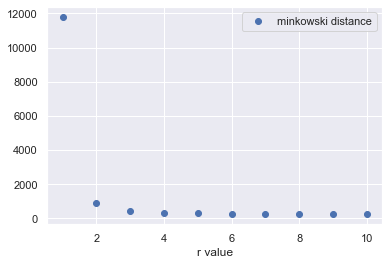

In [35]:
high = stock_data['High'].tolist()
low = stock_data['Low'].tolist()

# manhattan

print("Manhattan ditance or city block distance using cityblock method : ", round(cityblock(high, low),2))
print("Manhattan ditance or city block distance using minkowski method : ", get_minkowski_distance(high, low, 1))


# euclidean

print("Euclidean distance using euclidean method : ", round(np.linalg.norm(np.array(high) - np.array(low)),2))
print("Euclidean distance using minkowski method : ", get_minkowski_distance(np.array(high),np.array(low), 2))

calculate_minkowski_distance_plot_r_vs_distance(high, low,10 )

# Report Assignment

# Q1. What are your observations from the similarity study conducted in this experiment? 

# Please design a plagiarism detection system based on your learnings in this exercise. Mention the advantages and disadvantages of your designed system with respect to performance, efficiency and accuracy. Please highlight failure scenarios of your designed system.

In [36]:
def plagerism_detection_system(df, doc_col_name):

    bag_of_words = []
    df['Tokens'] = ''
    
    score_df = pd.DataFrame(columns=["document_1","document_2","jaccard_score","cosine_score"])
    
    for ind in range(df.shape[0]):
        df['Tokens'][ind] = lower_case_conversion_stem_and_remove_stopwords(get_tokens(df[doc_col_name][ind]))
        bag_of_words.extend(df['Tokens'][ind])
        
    bag_of_words = get_unique_values(bag_of_words)
    
    binary_vector = pd.DataFrame(columns = bag_of_words)
    count_vector = pd.DataFrame(columns = bag_of_words)
    
    for i in range(df.shape[0]):
        binary_vector.loc[i], count_vector.loc[i] = get_binary_and_count_vector(bag_of_words, df['Tokens'][i])
    
    score_df_index = 0
    
    for i in range(binary_vector.shape[0]):
        for j in range(i, binary_vector.shape[0]):
            jaccard_similarity_score, cosine_similarity_score = get_jackard_binary_vector_cosine_count_vector_similarity(binary_vector.loc[i], binary_vector.loc[j], count_vector.loc[i], count_vector.loc[j])
            score_df.loc[score_df_index] =  ["document "+ str(i),"document "+str(j), jaccard_similarity_score, cosine_similarity_score]
            score_df_index += 1
            if(i!=j):
                score_df.loc[score_df_index] =  ["document "+ str(j),"document "+str(i), jaccard_similarity_score, cosine_similarity_score]
            score_df_index += 1
                
    temp = count_vector.iloc[0].to_numpy()
    
    pivoted_data = score_df.iloc[:,[0,1,2]].pivot("document_1", "document_2", "jaccard_score")        
    heat_map(pivoted_data, "Jackard Similarity Scores")
    pivoted_data = score_df.iloc[:,[0,1,3]].pivot("document_1", "document_2", "cosine_score")   
    heat_map(pivoted_data, "Cosine Similarity Scores")
    

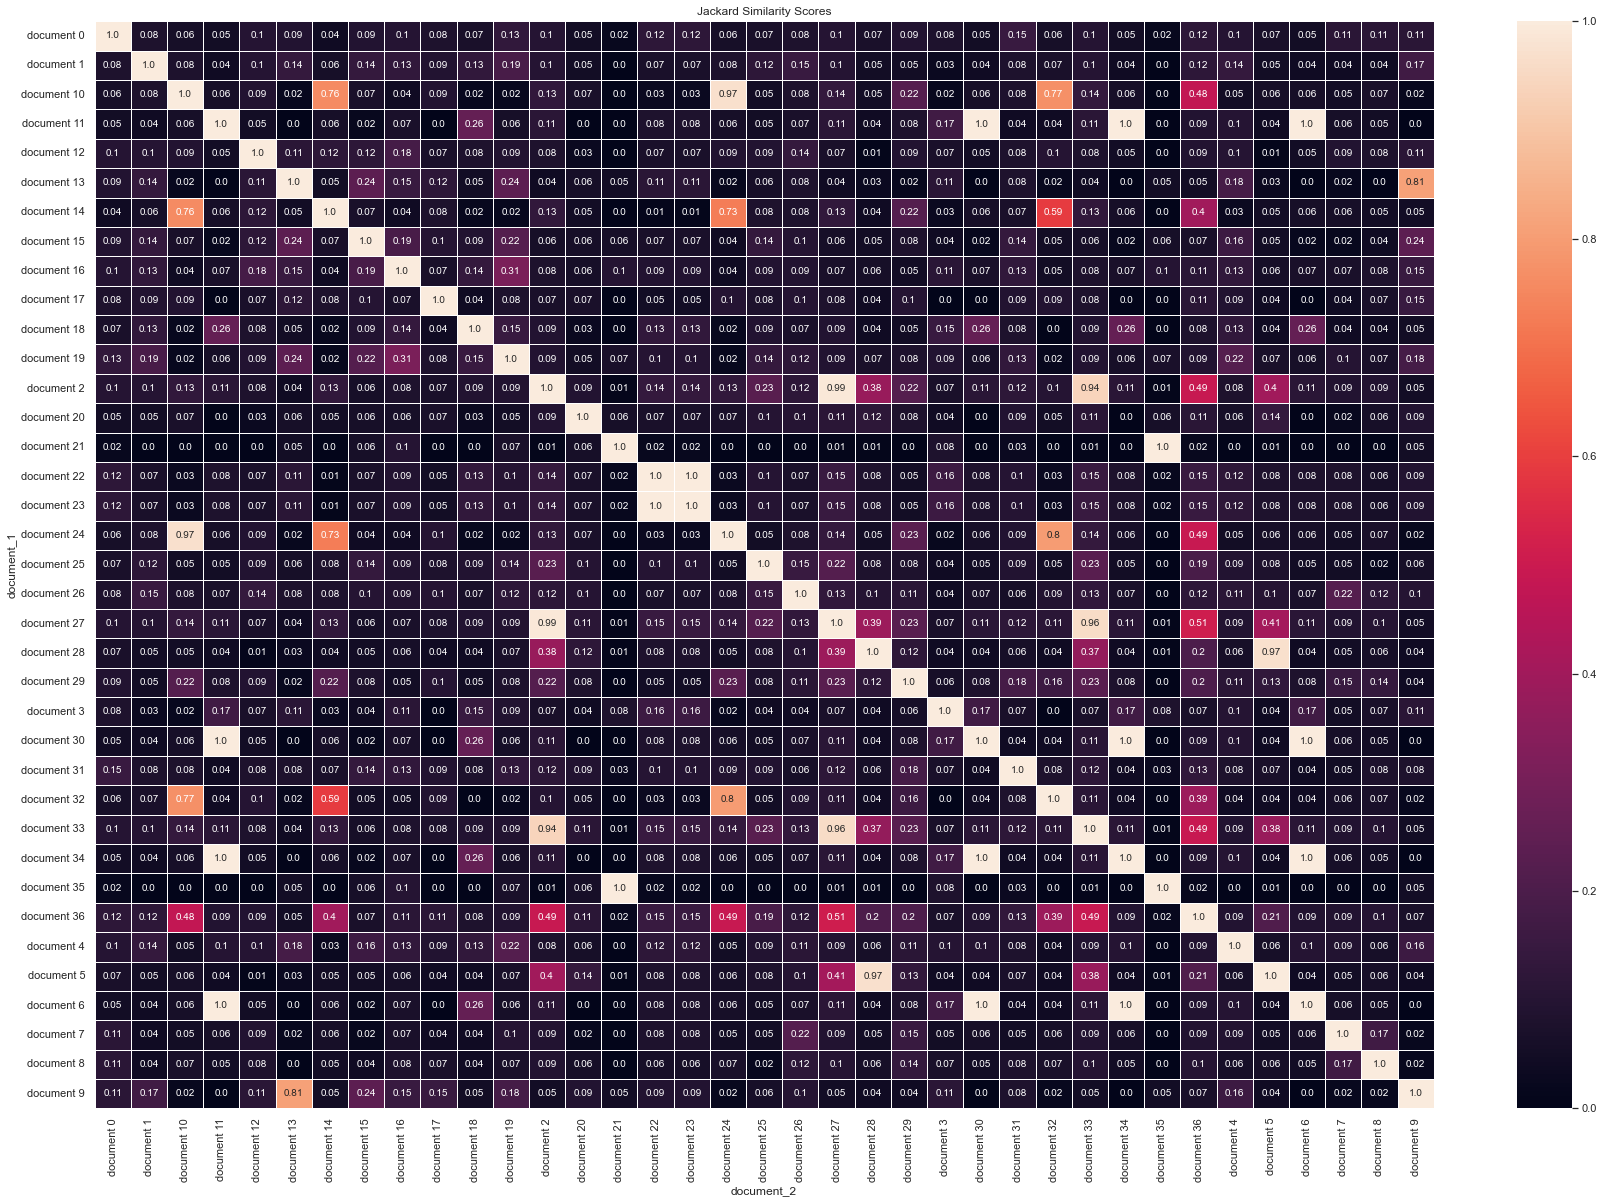

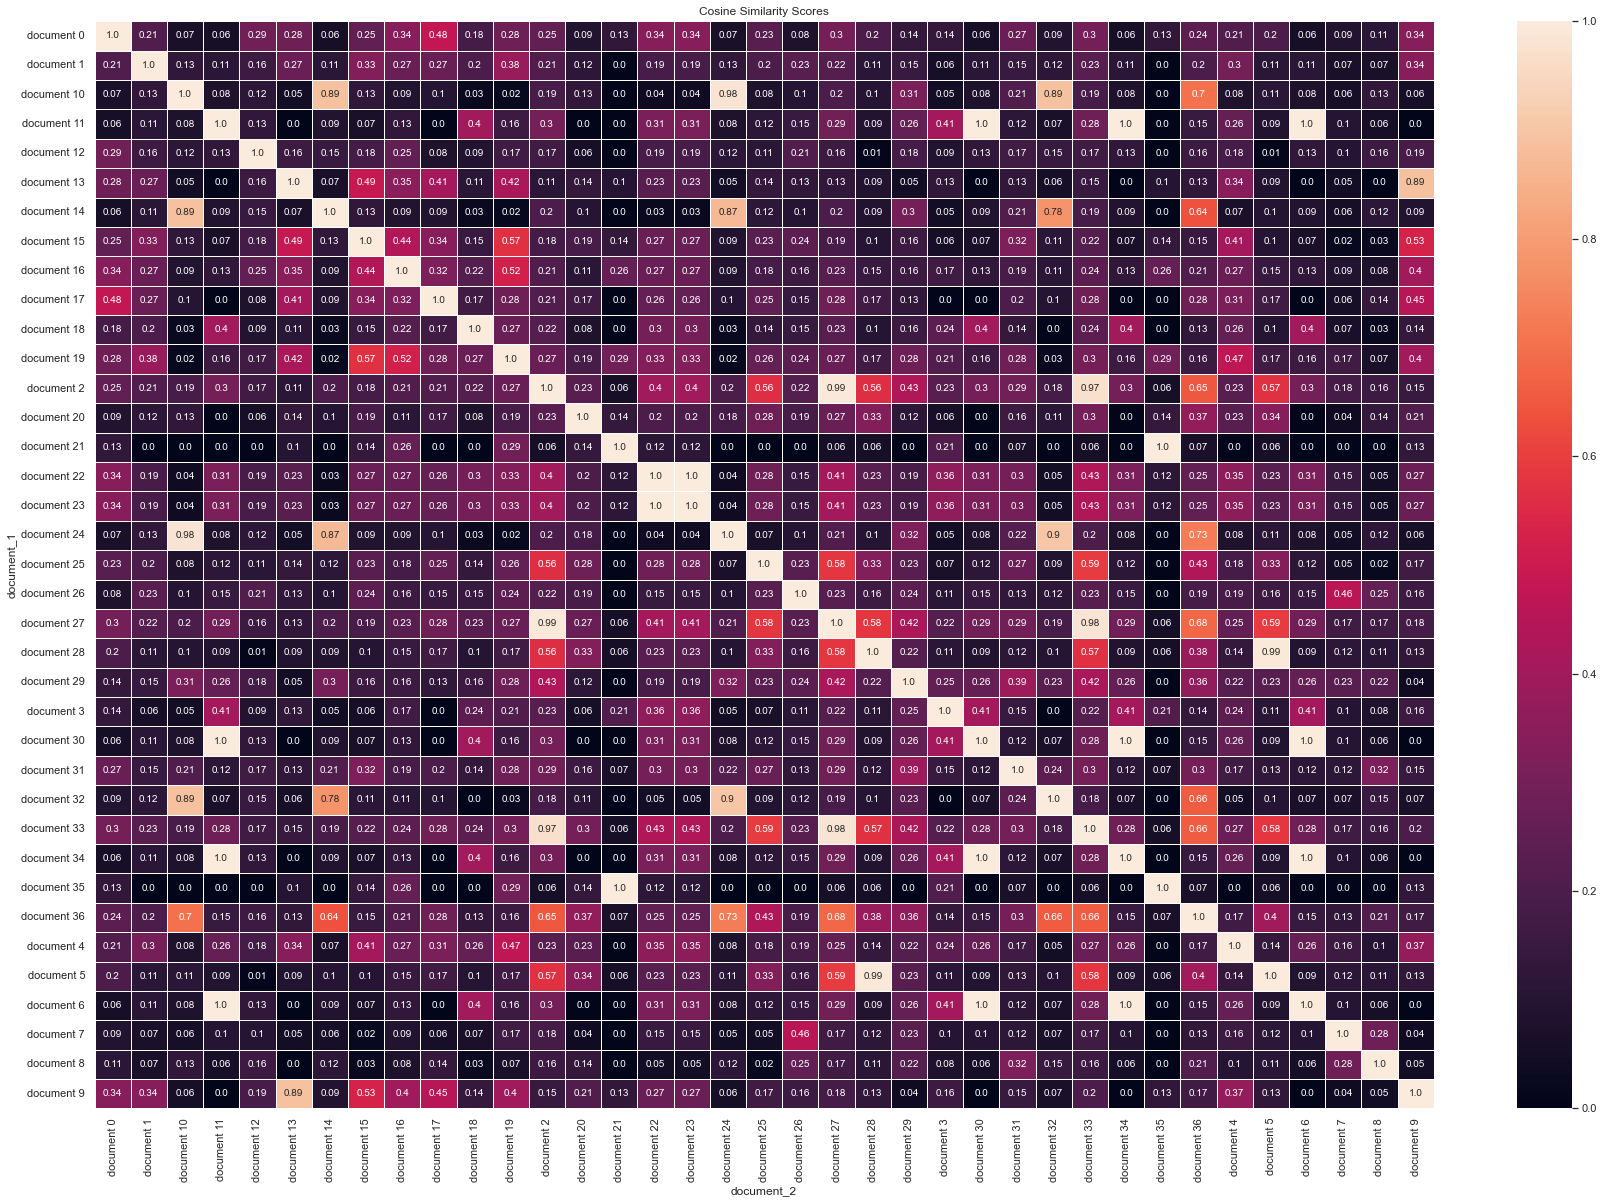

In [38]:
plagerism_detection_system(reports_of_students,'Report')

# Q2. Mention a few use cases where similarity measure is useful for classification / categorization and may be used instead of distance measure.